ссылки загруженных на Google диск файлов с данными для анализа

https://drive.google.com/file/d/1vmrY7REqHk1Io9fVIoCjiZ5DdSSfMgf8/view?usp=share_link

https://drive.google.com/file/d/1C4kzKvgydLhekWbhljTBQAUiSYEN9DI-/view?usp=share_link

загружаем файлы в colab

In [352]:
! gdown --id 1vmrY7REqHk1Io9fVIoCjiZ5DdSSfMgf8

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1vmrY7REqHk1Io9fVIoCjiZ5DdSSfMgf8
To: /content/Taxi_data.ftr
100% 79.9M/79.9M [00:01<00:00, 50.0MB/s]


In [353]:
! gdown --id 1C4kzKvgydLhekWbhljTBQAUiSYEN9DI-

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1C4kzKvgydLhekWbhljTBQAUiSYEN9DI-
To: /content/Estimated_coverage.ftr
100% 16.3k/16.3k [00:00<00:00, 35.0MB/s]


In [354]:
!pip install pyarrow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [355]:
# импортируем библиотеки и загружаем данные
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

df = pd.read_feather('/content/Taxi_data.ftr')
df_cover = pd.read_feather('/content/Estimated_coverage.ftr')

In [356]:
# вывод первых 5 строчек датафрейма
df.head()

,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Community Area,Dropoff Community Area,Fare,Tips,Tolls,Extras,Trip Total,Payment Type,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Taxi ID
0,2015-02-06 06:45:00,2015-02-06 07:00:00,540.0,2.8,21.0,15.0,8.85,0.00,0.0,0.0,8.85,No Charge,Top Cab Affiliation,41.938666,-87.711211,41.954028,-87.763399,250
1,2015-02-13 20:30:00,2015-02-13 20:45:00,600.0,2.0,8.0,28.0,8.25,1.00,0.0,0.0,9.25,Credit Card,KOAM Taxi Association,41.890922,-87.618868,41.879067,-87.657005,1915
2,2015-03-11 23:30:00,2015-03-11 23:45:00,540.0,0.1,28.0,8.0,7.65,0.00,0.0,0.0,7.65,Cash,Taxi Affiliation Services,41.879255,-87.642649,41.892508,-87.626215,110
3,2015-03-13 22:15:00,2015-03-13 22:15:00,360.0,1.7,33.0,32.0,6.65,0.00,0.0,1.0,7.65,Credit Card,Choice Taxi Association,41.849247,-87.624135,41.871016,-87.631407,1802
4,2015-03-13 22:15:00,2015-03-13 22:15:00,0.0,0.0,NaN,NaN,40.85,8.17,0.0,0.0,49.02,Credit Card,Chicago Elite Cab Corp. (Chicago Carriag,NaN,NaN,NaN,NaN,3219


In [357]:
# вывод первых 5 строчек датафрейма
df_cover.head()

,Hour Trip Start,Estimated coverage
0,2015-02-01 00:00:00,0.36
1,2015-02-01 01:00:00,0.61
2,2015-02-01 02:00:00,0.74
3,2015-02-01 03:00:00,0.73
4,2015-02-01 04:00:00,0.79


In [358]:
# основная информация о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826887 entries, 0 to 1826886
Data columns (total 18 columns):
 #   Column                      Dtype         
---  ------                      -----         
 0   Trip Start Timestamp        datetime64[ns]
 1   Trip End Timestamp          datetime64[ns]
 2   Trip Seconds                float64       
 3   Trip Miles                  float64       
 4   Pickup Community Area       float64       
 5   Dropoff Community Area      float64       
 6   Fare                        float64       
 7   Tips                        float64       
 8   Tolls                       float64       
 9   Extras                      float64       
 10  Trip Total                  float64       
 11  Payment Type                category      
 12  Company                     category      
 13  Pickup Centroid Latitude    float64       
 14  Pickup Centroid Longitude   float64       
 15  Dropoff Centroid Latitude   float64       
 16  Dropoff Centroid L

array([[<Axes: title={'center': 'Trip Start Timestamp'}>,
        <Axes: title={'center': 'Trip End Timestamp'}>,
        <Axes: title={'center': 'Trip Seconds'}>,
        <Axes: title={'center': 'Trip Miles'}>],
       [<Axes: title={'center': 'Pickup Community Area'}>,
        <Axes: title={'center': 'Dropoff Community Area'}>,
        <Axes: title={'center': 'Fare'}>,
        <Axes: title={'center': 'Tips'}>],
       [<Axes: title={'center': 'Tolls'}>,
        <Axes: title={'center': 'Extras'}>,
        <Axes: title={'center': 'Trip Total'}>,
        <Axes: title={'center': 'Pickup Centroid Latitude'}>],
       [<Axes: title={'center': 'Pickup Centroid Longitude'}>,
        <Axes: title={'center': 'Dropoff Centroid Latitude'}>,
        <Axes: title={'center': 'Dropoff Centroid Longitude'}>,
        <Axes: title={'center': 'Taxi ID'}>]], dtype=object)

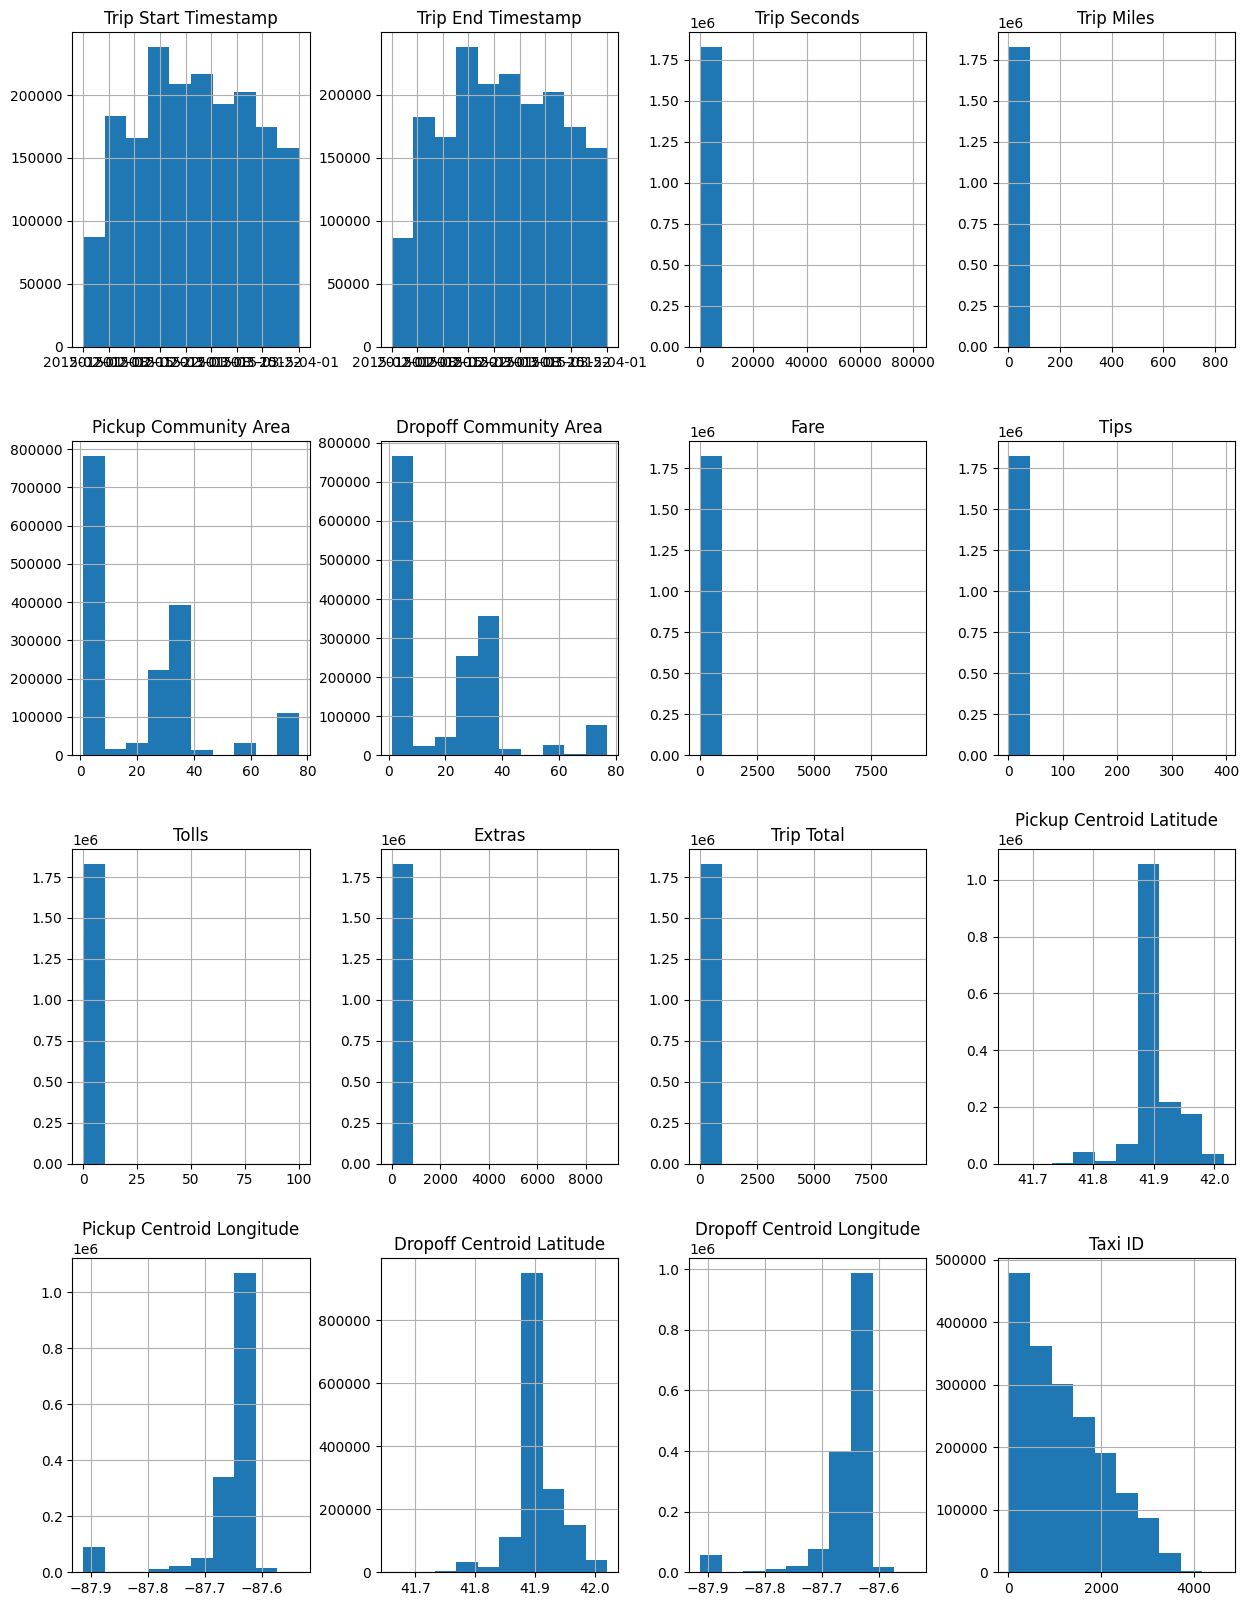

In [359]:
# общая гистограмма
df.hist(figsize=(15, 20))

Столбцы:

* Trip Start Timestamp: дата и время начала поездки
* Trip End Timestamp: дата и время окончания поездки
* Trip Seconds: продолжительность поездки в секундах
* Trip Miles: расстояние, пройденное во время поездки в милях
* Pickup Community Area: зона, где был подобран клиент
* Dropoff Community Area: зона, где был высажен клиент
* Fare: сумма тарифа, взимаемая за поездку в долларах
* Tips: сумма чаевых за поездку
* Tolls: сумма, уплачиваемая во время поездки (за платные дороги)
* Extras: Дополнительные сборы за поездку
* Trip Total: общая сумма оплаты за поездку
* Payment Type: Тип оплаты поездки
* Company: Компания такси, связанная с поездкой
* Pickup Centroid Latitude, Pickup Centroid Longitude, Dropoff Centroid Latitude, Dropoff Centroid Longitude: координаты центров кластеров посадки/высадки
* Taxi ID: Уникальный идентификатор такси

Этот набор данных предоставляет ценную информацию для анализа поездок такси, включая продолжительность, расстояние, оплату и географические координаты мест посадки и высадки. Его можно использовать для получения информации о моделях использования такси, распределении платы за проезд, популярных местах посадки/высадки и многом другом. Источник: data.cityofchicago.org

In [360]:
# основная информация о датафрейме
df_cover.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413 entries, 0 to 1412
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Hour Trip Start     1413 non-null   datetime64[ns]
 1   Estimated coverage  1411 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 22.2 KB


array([[<Axes: title={'center': 'Hour Trip Start'}>,
        <Axes: title={'center': 'Estimated coverage'}>]], dtype=object)

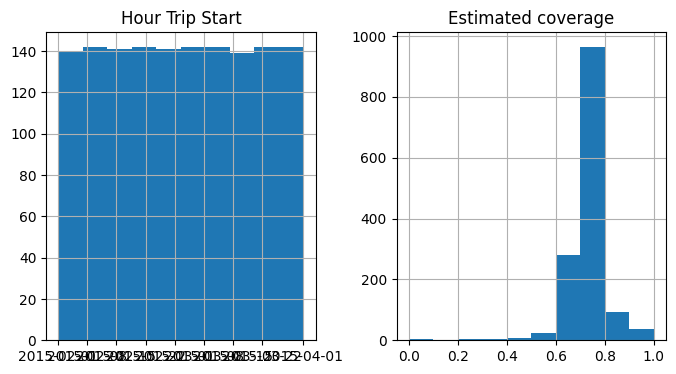

In [361]:
# общая гистограмма
df_cover.hist(figsize=(8, 4))

In [362]:
df_cover.describe()

,Estimated coverage
count,1411.000000
mean,0.731651
std,0.076101
min,0.000000
25%,0.710000
50%,0.730000
75%,0.760000
max,1.000000


Столбцы:

* Hour Trip Start: час начала поездки
* Estimated coverage: расчётная величина покрытия машинами

Рассчитанная на основании данных доля уникальных клиентов в этот час, которым был предложен вариант поездки по запросу (даже если они не воспользовались услугой). 

In [363]:
# переименование столбцов (перевод в snake_case)
df.columns = [x.lower().replace(' ', '_') for x in df.columns]    
df_cover.columns = [x.lower().replace(' ', '_') for x in df_cover.columns]    

In [364]:
df = df[['trip_start_timestamp', 'trip_end_timestamp', 'trip_seconds', 'trip_miles', 'fare', 'tips', 'trip_total',  'taxi_id']]

In [365]:
# подсчёт пропусков
df.isna().sum() 

trip_start_timestamp     0
trip_end_timestamp       0
trip_seconds            16
trip_miles               4
fare                     2
tips                     2
trip_total               2
taxi_id                  0
dtype: int64

In [366]:
# подсчёт пропусков
df_cover.isna().sum() 

hour_trip_start       0
estimated_coverage    2
dtype: int64

In [367]:
# доли пропусков в ячейках
df.isna().mean() 

trip_start_timestamp    0.000000
trip_end_timestamp      0.000000
trip_seconds            0.000009
trip_miles              0.000002
fare                    0.000001
tips                    0.000001
trip_total              0.000001
taxi_id                 0.000000
dtype: float64

In [368]:
# удаление строк, в которых в столбцах trip_seconds, trip_miles, fare, tips, trip_total встречается NaN
df = df.dropna(subset=['trip_seconds', 'trip_miles', 'fare', 'tips', 'trip_total']) 

In [369]:
# проверка наличия явных дубликатов
df.duplicated().sum()

2993

In [370]:
# удаление явных дубликатов 
df = df.drop_duplicates()

In [371]:
# проверка наличия явных дубликатов
df_cover.duplicated().sum()

0

In [372]:
# проверка количества различных значений 
df.nunique()

trip_start_timestamp    5565
trip_end_timestamp      5593
trip_seconds             299
trip_miles               687
fare                    2086
tips                    1966
trip_total              6198
taxi_id                 4655
dtype: int64

In [373]:
# проверка количества различных значений 
df_cover.nunique()

hour_trip_start       1413
estimated_coverage      60
dtype: int64

In [374]:
# добавление столбца с округленным до часа времени
df['hour_trip_start'] = df['trip_start_timestamp'].dt.round('H')

In [375]:
# категоризация по времени суток
df['hour'] = df['hour_trip_start'].dt.hour
df['day'] = df['hour_trip_start'].dt.round('D')
df['day_of_week'] = df['hour_trip_start'].dt.dayofweek+1
df['week'] = df['hour_trip_start'].dt.isocalendar().week
df['month'] = df['hour_trip_start'].dt.month

def times_of_day (row):
    try:
        if row >=0 and row<6:
            return 'ночь'
        elif row >=6 and row < 12:
            return 'утро'
        elif row >=12 and row < 18:
            return 'день'
        elif row >=18 and row < 24:
            return 'вечер'
    except:
        return 'нет категории'

df['time_of_day'] = df['hour'].apply(times_of_day)

In [376]:
# минимальная и максимальная даты данных
print(min(df['trip_start_timestamp']), max(df['trip_start_timestamp']))

2015-02-01 00:00:00 2015-03-31 23:45:00


In [377]:
# количество машин 
total_taxi = len(df['taxi_id'].unique())
print('Количество такси:', total_taxi)

Количество такси: 4655


,hour_trip_start,total_taxi_per_hour
1243,2015-03-24 23:00:00,1
1249,2015-03-25 05:00:00,1
75,2015-02-04 04:00:00,1
1250,2015-03-25 06:00:00,1
1251,2015-03-25 07:00:00,1
362,2015-02-16 04:00:00,2
71,2015-02-03 23:00:00,2
1395,2015-03-31 07:00:00,2
74,2015-02-04 02:00:00,2
603,2015-02-26 05:00:00,3


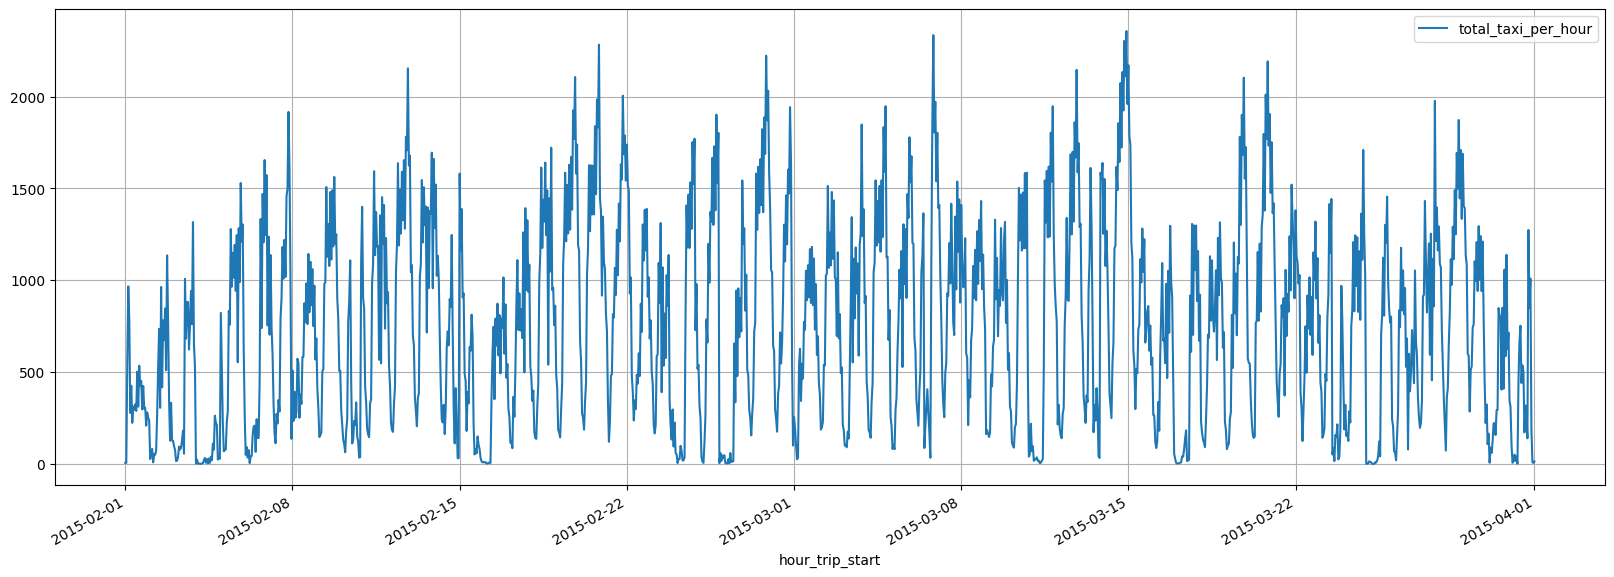

In [378]:
# количество машин на линии (только по данным начала поездок) для каждого часа
total_taxi_per_hour = df.pivot_table(index='hour_trip_start', values='taxi_id', aggfunc='nunique')
total_taxi_per_hour = total_taxi_per_hour.rename(columns={'taxi_id':'total_taxi_per_hour'})
total_taxi_per_hour.plot(grid=True, figsize=(20,7))
total_taxi_per_hour.reset_index().sort_values(by='total_taxi_per_hour', ascending=True).head(20) #низкое предложение

In [379]:
# количество машин на линии (только по данным начала поездок) по времени суток
time_of_day_cnt = df.pivot_table(index='hour', values='taxi_id', aggfunc='nunique').reset_index()
time_of_day_cnt = time_of_day_cnt.sort_values(by='taxi_id', ascending=False)
display(time_of_day_cnt)
fig = px.bar(time_of_day_cnt, # загружаем данные и заново их сортируем
             x='hour', # указываем столбец с данными для оси X
             y='taxi_id', # указываем столбец с данными для оси Y
             text='taxi_id' # добавляем аргумент, который отобразит текст с информацией
                                # о количестве машин внутри столбца графика
            )
# оформляем график
fig.update_layout(title='Количество машин на линии',
                   xaxis_title='Время суток',
                   yaxis_title='Количество машин')
fig.show() # выводим график

,hour,taxi_id
16,16,3786
18,18,3772
20,20,3748
14,14,3721
19,19,3662
22,22,3658
12,12,3649
17,17,3646
15,15,3634
21,21,3613


In [380]:
# количество поездок
total_trips = df['taxi_id'].count() 
print('Количество поездок:', total_trips)

Количество поездок: 1823872


,hour_trip_start,total_trips_per_hour
1002,2015-03-14 20:00:00,6983
1004,2015-03-14 22:00:00,6793
1006,2015-03-15 00:00:00,6542
810,2015-03-06 20:00:00,6326
474,2015-02-20 20:00:00,6116
642,2015-02-27 20:00:00,6005
666,2015-02-28 20:00:00,5444
1144,2015-03-20 20:00:00,5419
498,2015-02-21 20:00:00,5399
282,2015-02-12 20:00:00,5356


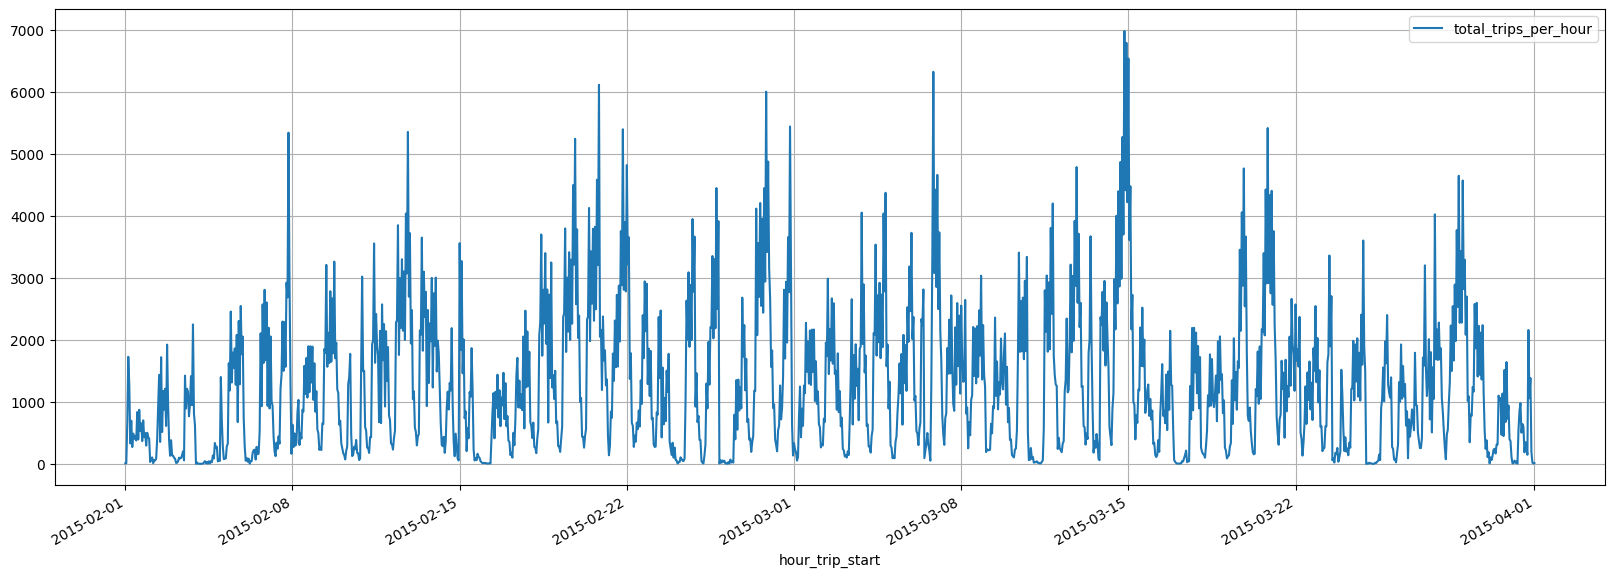

In [381]:
# количество поездок для каждого часа
total_trips_per_hour = df.pivot_table(index='hour_trip_start', values='trip_start_timestamp', aggfunc='count')
total_trips_per_hour = total_trips_per_hour.rename(columns={'trip_start_timestamp':'total_trips_per_hour'})
total_trips_per_hour.plot(grid=True, figsize=(20,7))
total_trips_per_hour.reset_index().sort_values(by='total_trips_per_hour', ascending=False).head(20) #топ-20

In [382]:
# количество поездок по часам
trips_cnt = df.pivot_table(index='hour', values='trip_start_timestamp', aggfunc='count').reset_index()
trips_cnt = trips_cnt.sort_values(by='trip_start_timestamp', ascending=False)
display(trips_cnt)
fig = px.bar(trips_cnt, # загружаем данные и заново их сортируем
             x='hour', # указываем столбец с данными для оси X
             y='trip_start_timestamp', # указываем столбец с данными для оси Y
             text='trip_start_timestamp' # добавляем аргумент, который отобразит текст с информацией
                                # о количестве поездок внутри столбца графика
            )
# оформляем график
fig.update_layout(title='Количество поездок по часам',
                   xaxis_title='Время суток',
                   yaxis_title='Количество поездок')
fig.update_traces(textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show() # выводим график

,hour,trip_start_timestamp
20,20,168521
18,18,140386
16,16,118479
22,22,113119
14,14,112901
10,10,108738
12,12,103019
19,19,96299
0,0,93937
21,21,86512


In [383]:
# средняя длительность поездки 
mean_duration = df['trip_seconds'].mean()
print('Средняя длительность поездки:', round(mean_duration/60), 'минут.')

Средняя длительность поездки: 11 минут.


,hour_trip_start,mean_duration_per_hour
75,2015-02-04 04:00:00,2820.000000
53,2015-02-03 05:00:00,1946.341463
595,2015-02-25 21:00:00,1782.857143
1203,2015-03-23 07:00:00,1653.874172
605,2015-02-26 07:00:00,1620.000000
869,2015-03-09 07:00:00,1387.667343
1202,2015-03-23 06:00:00,1281.773399
364,2015-02-16 06:00:00,1267.500000
1250,2015-03-25 06:00:00,1260.000000
976,2015-03-13 18:00:00,1250.250000


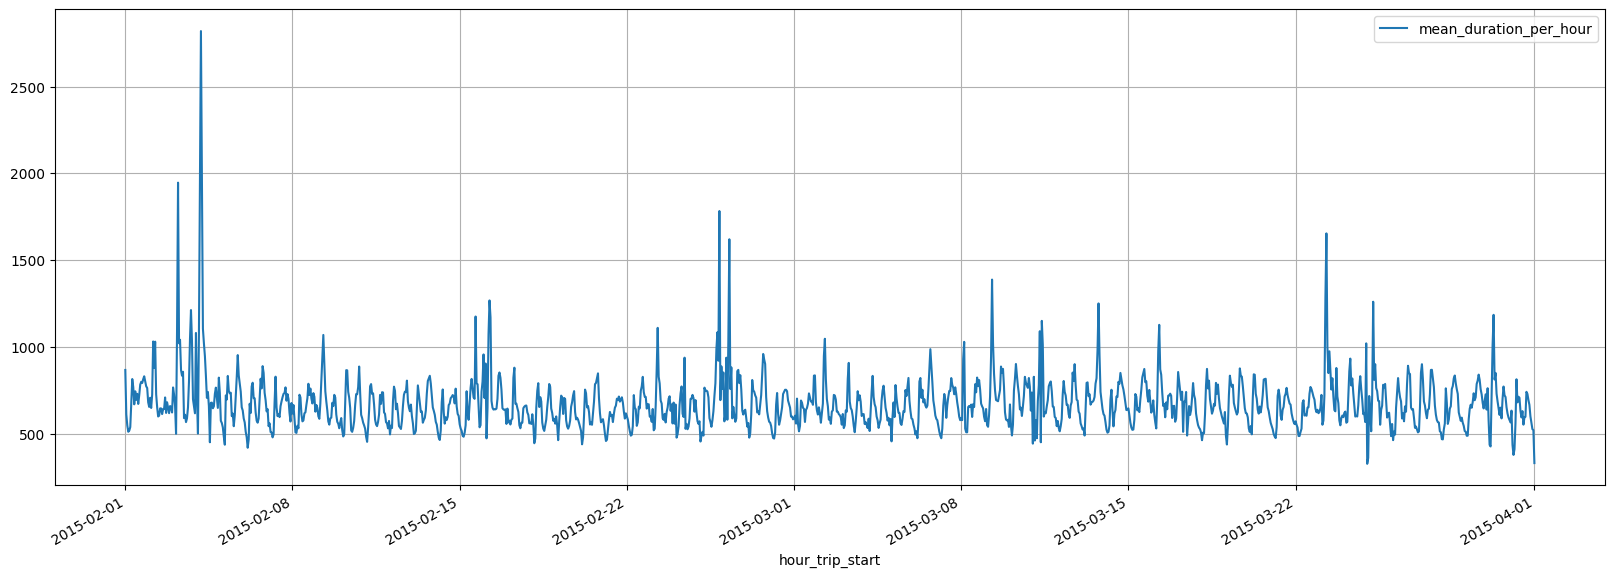

In [384]:
# средняя длительность поездки для каждого часа
mean_duration_per_hour = df.pivot_table(index='hour_trip_start', values='trip_seconds', aggfunc='mean')
mean_duration_per_hour = mean_duration_per_hour.rename(columns={'trip_seconds':'mean_duration_per_hour'})
mean_duration_per_hour.plot(grid=True, figsize=(20,7))
mean_duration_per_hour.reset_index().sort_values(by='mean_duration_per_hour', ascending=False).head(20) #топ-20

In [385]:
# средняя длина поездки  
mean_length = df['trip_miles'].mean()
print('Средняя длина поездки:', round(mean_length,2), 'миль.')

Средняя длина поездки: 2.17 миль.


,hour_trip_start,mean_length_per_hour
1250,2015-03-25 06:00:00,12.700000
75,2015-02-04 04:00:00,12.400000
364,2015-02-16 06:00:00,10.200000
76,2015-02-04 06:00:00,9.820000
71,2015-02-03 23:00:00,7.850000
363,2015-02-16 05:00:00,7.285714
74,2015-02-04 02:00:00,6.850000
1370,2015-03-30 06:00:00,6.806061
595,2015-02-25 21:00:00,6.528571
358,2015-02-16 00:00:00,6.506250


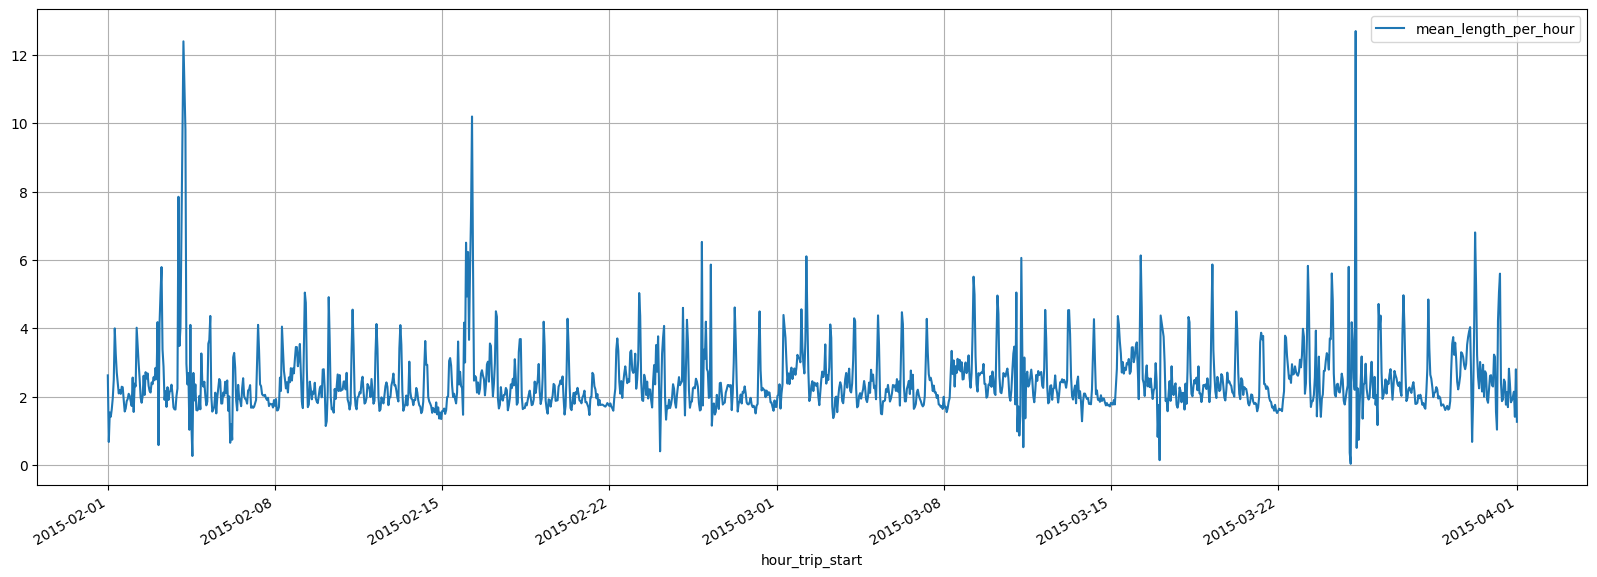

In [386]:
# средняя длина поездки для каждого часа
mean_length_per_hour = df.pivot_table(index='hour_trip_start', values='trip_miles', aggfunc='mean')
mean_length_per_hour = mean_length_per_hour.rename(columns={'trip_miles':'mean_length_per_hour'})
mean_length_per_hour.plot(grid=True, figsize=(20,7))
mean_length_per_hour.reset_index().sort_values(by='mean_length_per_hour', ascending=False).head(20) #топ-20

In [387]:
# средняя тарифная стоимость  
mean_fare = df['fare'].mean() 
print('Средняя тарифная стоимость:', round(mean_fare,2) , 'долларов.')

Средняя тарифная стоимость: 11.94 долларов.


,hour_trip_start,mean_fare_per_hour
75,2015-02-04 04:00:00,31.250000
1250,2015-03-25 06:00:00,27.250000
364,2015-02-16 06:00:00,27.025000
53,2015-02-03 05:00:00,26.734146
1394,2015-03-31 06:00:00,26.173750
1370,2015-03-30 06:00:00,25.626136
917,2015-03-11 07:00:00,25.575000
1036,2015-03-16 06:00:00,25.406641
1202,2015-03-23 06:00:00,25.190673
868,2015-03-09 06:00:00,24.874111


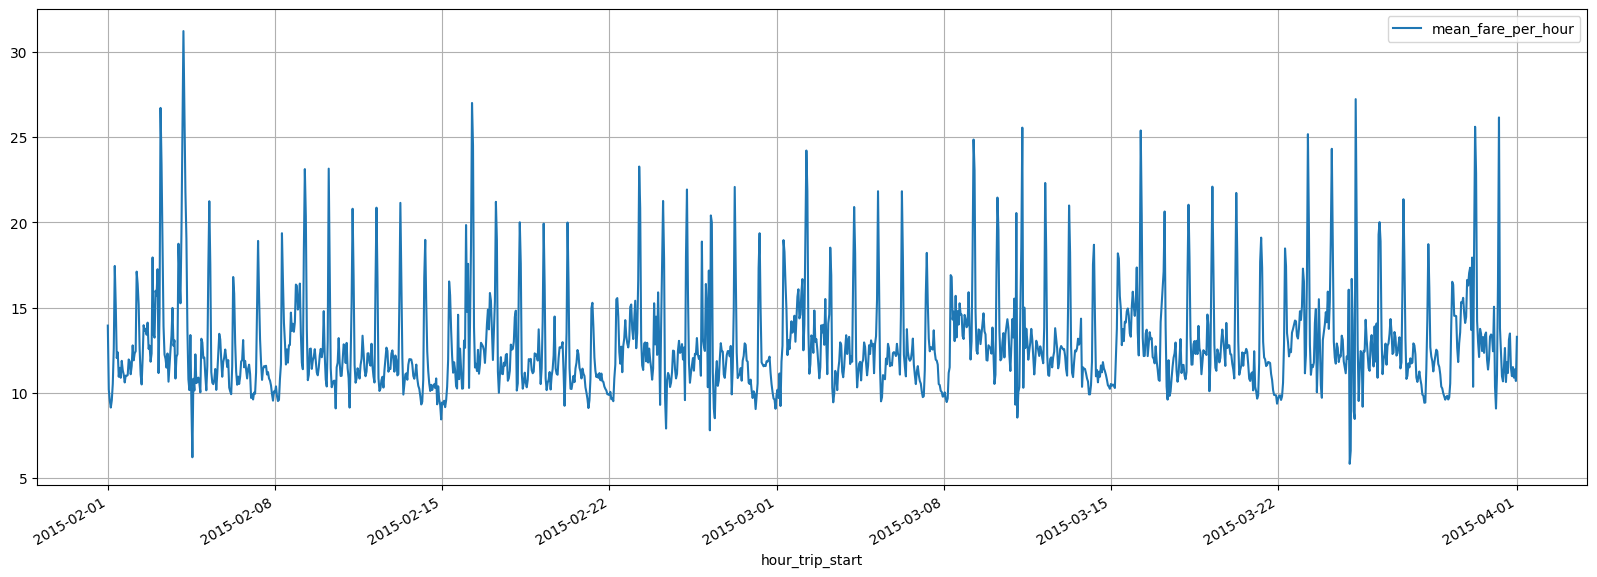

In [388]:
# средняя тарифная стоимость поездки для каждого часа
mean_fare_per_hour = df.pivot_table(index='hour_trip_start', values='fare', aggfunc='mean')
mean_fare_per_hour = mean_fare_per_hour.rename(columns={'fare':'mean_fare_per_hour'})
mean_fare_per_hour.plot(grid=True, figsize=(20,7))
mean_fare_per_hour.reset_index().sort_values(by='mean_fare_per_hour', ascending=False).head(20) #топ-20

In [389]:
# общая выручка из расчёта на одного водителя (исходя из того, что водитель получает 60% тарифа за поездку и все чаевые)
trip_total_per_taxi = df.pivot_table(index='taxi_id', values='trip_total', aggfunc='sum')
trip_total_per_taxi = trip_total_per_taxi.rename(columns={'trip_total':'total_per_taxi'})
trip_total_per_taxi.reset_index().sort_values(by='total_per_taxi', ascending=False).head(20) #топ-20

,taxi_id,total_per_taxi
1713,1713,34812.12
445,445,27682.26
1,1,21458.75
328,328,20073.19
29,29,19327.50
1737,1737,19214.96
19,19,18857.39
2,2,18811.71
1037,1037,18120.13
151,151,17825.49


In [390]:
# выручка водителя из расчёта на одного водителя (исходя из того, что водитель получает 60% тарифа за поездку и все чаевые)
df['revenue'] = df['fare']*0.6+df['tips']

revenue_per_taxi = df.pivot_table(index='taxi_id', values='revenue', aggfunc='sum')
revenue_per_taxi = revenue_per_taxi.rename(columns={'revenue':'revenue_per_taxi'})
revenue_per_taxi.reset_index().sort_values(by='revenue_per_taxi', ascending=False).head(20) #топ-20

,taxi_id,revenue_per_taxi
1,1,12930.210
445,445,11643.410
2,2,11416.230
19,19,11305.250
29,29,11286.440
20,20,10677.450
42,42,10398.380
30,30,10259.800
654,654,10182.396
54,54,10169.498


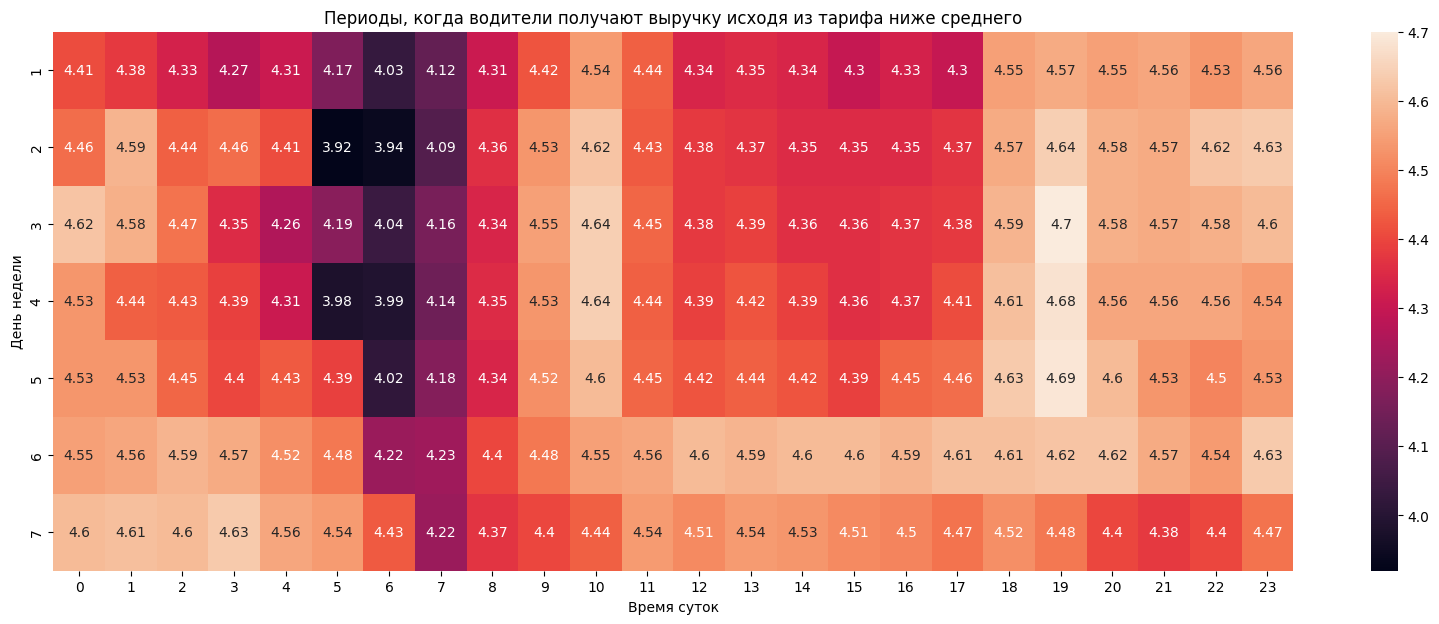

In [391]:
# периоды, когда водители получают выручку исходя из тарифа ниже среднего
df = df.merge(mean_fare_per_hour, how='left', on='hour_trip_start')

revenue_weekly = df.query('revenue<@mean_fare*0.6').pivot_table(index='day_of_week', columns='hour', values='revenue', aggfunc='mean').round(2)

# строим хитмэп
plt.figure(figsize=(20, 7)) # задаём размер графика
sns.heatmap(revenue_weekly, # датафрейм с данными
            annot=True, # добавляем подписи
            fmt='') # задаём исходный формат
plt.title('Периоды, когда водители получают выручку исходя из тарифа ниже среднего') # название графика
plt.ylabel('День недели')
plt.xlabel('Время суток')
plt.show() 

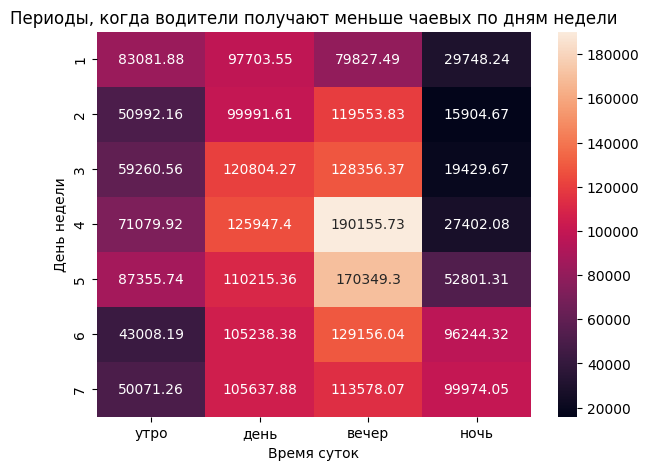

In [392]:
# периоды, когда водители получают меньше чаевых
tips_weekly = df.pivot_table(index='day_of_week', columns='time_of_day', values='tips', aggfunc='sum')
tips_weekly = tips_weekly[['утро', 'день', 'вечер', 'ночь']]
tips_weekly

# строим хитмэп
plt.figure(figsize=(7, 5)) # задаём размер графика
sns.heatmap(tips_weekly, # датафрейм с данными
            annot=True, # добавляем подписи
            fmt='') # задаём исходный формат
plt.title('Периоды, когда водители получают меньше чаевых по дням недели') # название графика
plt.ylabel('День недели')
plt.xlabel('Время суток')
plt.show() 

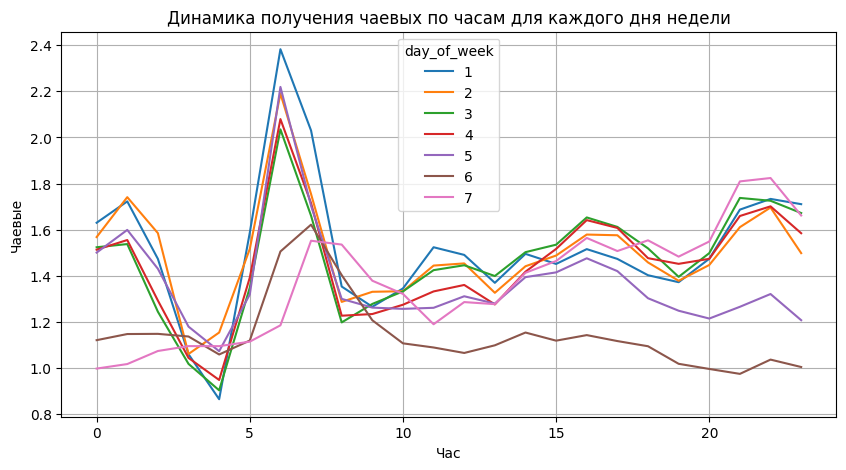

In [393]:
df.pivot_table(
    index='hour', columns='day_of_week', values='tips', aggfunc='mean'
).plot(grid=True, figsize=(10, 5))
plt.ylabel('Чаевые')
plt.xlabel('Час')
plt.title('Динамика получения чаевых по часам для каждого дня недели')
plt.show()

<Axes: xlabel='hour', ylabel='day_of_week'>

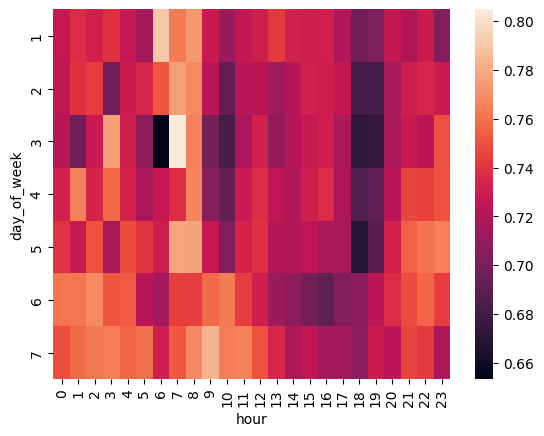

In [394]:
# критические периоды дефицита предложения
df = df.merge(df_cover, how='left', on='hour_trip_start')

sns.heatmap(df.pivot_table(index='day_of_week', columns='hour', values='estimated_coverage'))

Под нормальным показателем будем понимать среднее значение величины покрытия (0.73) со стандартным отклонением (0.08).

In [395]:
# оптимальное число машин на линии для обеспечения нормального показателя покрытия
df = df.merge(total_taxi_per_hour, how='left', on='hour_trip_start')

In [396]:
try:
  df['optimal_coverage'] = round(df['total_taxi_per_hour']*0.81/df['estimated_coverage'])
except ZeroDivisionError:
  df['optimal_coverage'] = 0

In [397]:
df['deficit'] = df['total_taxi_per_hour'] - df['optimal_coverage']

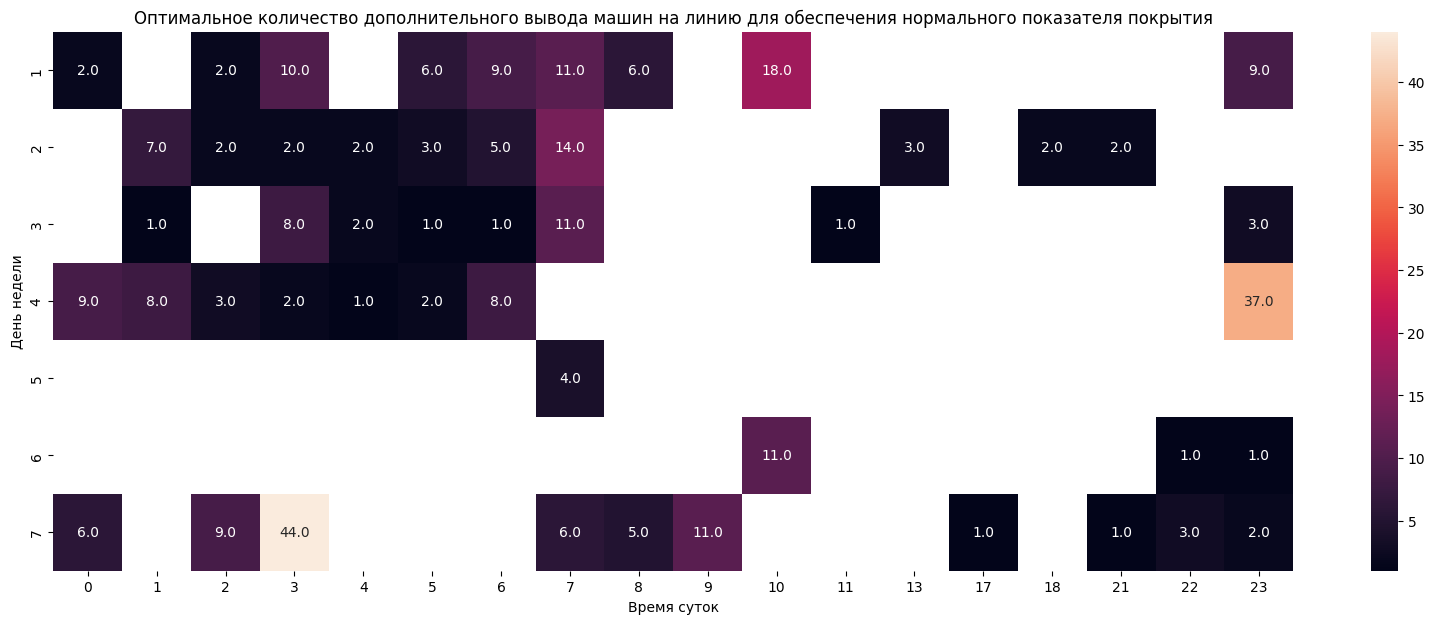

In [398]:
# строим хитмэп
plt.figure(figsize=(20, 7)) # задаём размер графика
sns.heatmap(df.query('deficit>0').pivot_table(index='day_of_week', columns='hour', values='deficit', aggfunc='mean').round(), # датафрейм с данными
            annot=True, # добавляем подписи
            fmt='') # задаём исходный формат
plt.title('Оптимальное количество дополнительного вывода машин на линию для обеспечения нормального показателя покрытия') # название графика
plt.ylabel('День недели')
plt.xlabel('Время суток')
plt.show() 

Этапы проекта: 
> &nbsp;
> 1. Подготовьте данные для анализа
> >  * Найти аномалии в данных, принять решение о их сохранении или отбрасывании
> 2. Рассчитайте для каждого часа:
> >  * Количество машин на линии (только по данным начала поездок)
> >  * Количество поездок
> >  * Среднюю длительность поездки
> >  * Среднюю длинну поездки
> >  * Среднюю тарифную стоимость поездки
> >  * Иные показатели, включая показатели из расчёта на одного водителя, включая общую выручку и выручку водителя (исходя из того, что водитель получает 60% тарифа за поездку и все чаевые)
> 3. Определите периоды когда водители получают 
> >  * выручку исходя из тарифа ниже среднего
> >  * меньше чаевых
> 4. Определите критические периоды дефицита предложения
> >  * рассчитайте оптимальное число машин на линии для обеспечения нормального показателя покрытия
> 5. Визуализируйте найденные в п.4 и важные рассчитанные ранее показатели с учётом недельных и суточных циклов
>
> 6. Определите периоды, в которые меры стимулирования предложения услуг такси нужны и будут наиболее эффективны
>
> 7. В рамках определённых в п.6 периодов оцените:
> >  * объём недополученной общей выручки из-за низкого предложения 
> >  * дефицит количества машин на линии (сколько нужно вывести машин дополнительно, чтобы достичь нормального покрытия)
> 8. (опционально) Предложите меры стимулирования предложения и оцените их эффективность
>
> 9. Подготовьте презентацию на 7-10 слайдов с основными результатами проекта.
> &nbsp;<br><br>